In [49]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Multivariate T using InvWishart')

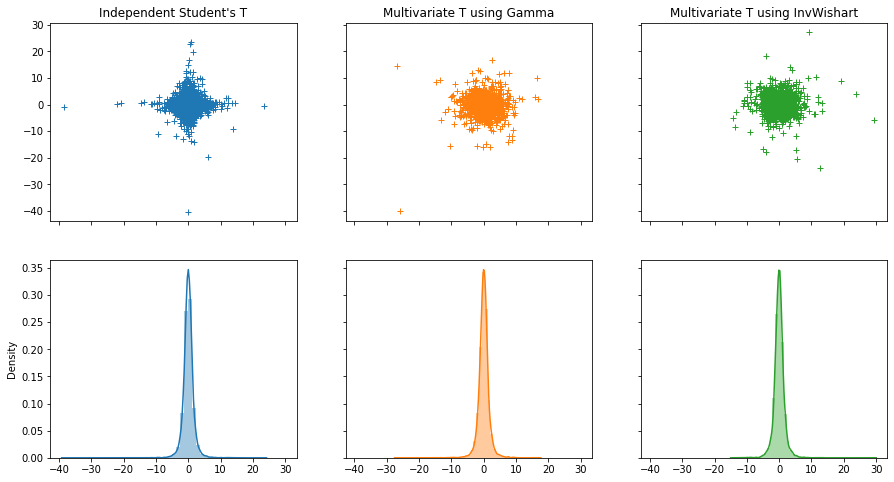

In [147]:
N = 10000
df = 3

t_indep = stats.t.rvs(size=(2, N), df=df)

gammas = stats.gamma.rvs(a=df/2, size=(1, N), scale=2)
t_uncorr = stats.norm.rvs(size=(2, N)) * np.sqrt(df / gammas)

covs = stats.invwishart.rvs(df=df+1, size=(N,), scale=np.eye(2))
Ls = np.linalg.cholesky(covs)
t_invwis = Ls @ (np.sqrt(df)*np.random.randn(N, 2, 1))

_, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey='row')
axes[0, 0].plot(t_indep[0], t_indep[1], marker='+', ls='', color="C0")
axes[0, 1].plot(t_uncorr[0], t_uncorr[1], marker='+', ls='', color="C1")
axes[0, 2].plot(t_invwis[:, 0, 0], t_invwis[:, 1, 0], marker='+', ls='', color="C2")

sns.distplot(t_indep[0], ax=axes[1, 0], color="C0")
sns.distplot(t_uncorr[0], ax=axes[1, 1], color="C1")
sns.distplot(t_invwis[:, 0, 0], ax=axes[1, 2], color="C2")

axes[0, 0].set_title("Independent Student's T")
axes[0, 1].set_title("Multivariate T using Gamma")
axes[0, 2].set_title("Multivariate T using InvWishart")

In [75]:
df = 3

gammas = stats.gamma.rvs(a=df/2, size=(N), scale=2)
t = stats.norm.rvs(size=(N)) * np.sqrt(df / gammas)

def np_cdf(x):
    return stats.t.cdf(x, df=df)

_, p = stats.ks_1samp(t, np_cdf, mode='exact')
print(f"for gamma-normal construction, p-value={p}")

for gamma-normal construction, p-value=0.9116448204811327


In [109]:
df = 3

covs = stats.invwishart.rvs(df=df+1, size=(N,), scale=np.eye(2))
Ls = np.linalg.cholesky(covs)
t_invwis = Ls @ (np.sqrt(df)*np.random.randn(N, 2, 1))

def np_cdf(x):
    return stats.t.cdf(x, df=df)

_, p = stats.ks_1samp(t_invwis[:, 0, 0], np_cdf, mode='exact')
print(f"for wishart-normal construction, p-value={p}")

for wishart-normal construction, p-value=0.8203129502237674


In [120]:
df = 3

def np_cdf(x):
    return stats.norm.cdf(x)

_, p = stats.ks_1samp(stats.norm.rvs(size=N), np_cdf, mode='exact')
print(f"p-value={p}")

p-value=0.6154409120767204


# Constructing the t-copula

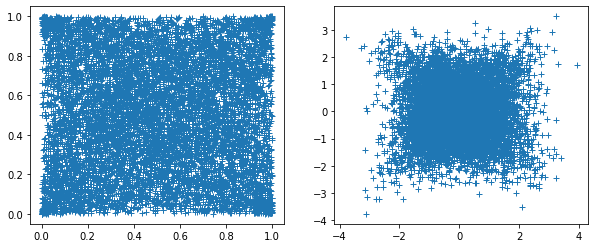

In [146]:
N = 10000
df = 3
rho = 0.0

# First sample a multivariate T
covs = stats.invwishart.rvs(df=df+1, size=(N,), scale=[[1, rho], [rho, 1]])
Ls = np.linalg.cholesky(covs)
t = Ls @ (np.sqrt(df)*np.random.randn(N, 2, 1))

t = t.reshape((N, 2)).transpose((1, 0))

# Then take the marginal CDF of each variable, so the marginals are uniformly distributed
# This is now a student-T copula
copula = stats.t.cdf(t, df=df)

# Finally, apply the inverse Gaussian CDF, so the marginals are Gaussian
g_marg = stats.norm.ppf(copula)

_, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(copula[0], copula[1], marker='+', ls='none')
axes[1].plot(g_marg[0], g_marg[1], marker='+', ls='none')